## Probablity Distribution 

Bernoulli distribution

##### Introduction 

Bernoulli distribution is a discret univariate probability distribution. A Bernoulli trial or experiment results in binary outcomes:  success or failure $(0 or 1)$. The trial’s success is denoted as $ p (x=1)$, and failure is expressed as $1-p ( x=0)$.

### Key Takeaways


##### 1.The Bernoulli distribution is a discrete probability indicator.

##### 2.It is used for determining the possible outcome of a single random experiment (Bernoulli trial).

##### 3.A Bernoulli trial can only have two results: success or failure.

##### 4.The Bernoulli distribution is different from the Binomial distribution, which determines the probability for multiple Binomial trials.

##### 5.The probability of success (p) and failure (q or 1-p) are key parameters in the Bernoulli distribution.

##### 6.The probability mass function (PMF):

\begin{equation}
P(X = x) = p^x \cdot (1-p)^{1-x} \tag{1}
\end{equation}

  where $(X)$ is the random variable, $(x)$ can be either 0 or 1, and $(p)$ is the probability of success.


Some imports

In [1]:
import numpy as np
import torch
from torch.distributions import Bernoulli
import math
from torch.optim import Adam
import matplotlib.pyplot as plt


Implementation of PMF 

In [2]:
p=0.6 #success=0.6 failure=0.4
import numpy as np
sample = np.random.choice([0, 1], p=[1 - p, p])
prob = (p ** sample) * ((1 - p) ** (1 - sample))
print("Sample:", sample)
print("Probability:", prob)

#Using PyTorch
import torch
from torch.distributions import Bernoulli
dist=Bernoulli(torch.tensor([p]))
sample=dist.sample()
print("Sample:", sample)
print("Probability:", dist)

#Set of Probablty of success
probs = torch.tensor([0.7, 0.4, 0.9])
bernoulli_dist = Bernoulli(probs=probs,logits=None)
samples = bernoulli_dist.sample()
print("probablity distributions:", bernoulli_dist)
print("Samples:", samples)

# Log-odds of success
logits = torch.tensor([0.847])
dist = Bernoulli(probs=None,logits=logits)
sample = dist.sample()
print("log odd prob :", dist)
print("Sample:", sample.item())

Sample: 0
Probability: 0.4
Sample: tensor([1.])
Probability: Bernoulli(probs: tensor([0.6000]))
probablity distributions: Bernoulli(probs: torch.Size([3]))
Samples: tensor([1., 0., 1.])
log odd prob : Bernoulli(probs: tensor([0.6999]), logits: tensor([0.8470]))
Sample: 1.0


Log probability of Bernoulli distribution

To obtain the log probability, we take the natural logarithm of the PMF:

\begin{equation}
\log P(X=x) = \log(p^x \cdot (1-p)^{1-x}) 
\end{equation}

\begin{equation}
\log P(X=x) = x \cdot \log(p) + (1-x) \cdot \log(1-p)
\end{equation}


In [3]:
sample=1
prob=0.6
log_probability = sample * math.log(p) + (1 - sample) * math.log(1 - p)
print("sample:", sample)
print("Log Probability:", log_probability)

#using PyTorch
sample = torch.tensor([1])
p = torch.tensor([0.6])
dist = Bernoulli(probs=p,logits=None)
sample=dist.sample()
log_prob=dist.log_prob(sample)
print("Sample:", sample)
print("Log Probability:", log_prob)


sample: 1
Log Probability: -0.5108256237659907
Sample: tensor([1.])
Log Probability: tensor([-0.5108])


Maximum Likelihood Estimations(MLE) for Bernoulli Distribution

To derive the Maximum Likelihood Estimation (MLE) for the Bernoulli distribution, let's assume we have a random sample of independent and identically distributed (i.i.d.) observations from a Bernoulli distribution with parameter p. Each observation can take a value of either 0 or 1.

The likelihood function for the Bernoulli distribution is given by:

$$ L(p) = \prod_{i=1}^{n} p^{x_i} \cdot (1-p)^{1-x_i} $$

where \(x_i\) is the i-th observation in the sample and n is the total number of observations.

To find the MLE for p, we want to find the value of p that maximizes the likelihood function L(p). It is often easier to work with the log-likelihood function, which is the natural logarithm of the likelihood function:

$$
\log L(p) = \sum_{i=1}^{n} x_i \cdot \log(p) + (1-x_i) \cdot \log(1-p)
$$

To find the MLE, we differentiate the log-likelihood function with respect to p and set it equal to zero:

$$
\frac{d}{dp}(\log L(p)) = \frac{1}{p}\sum_{i=1}^{n} x_i - \frac{1}{1-p}\sum_{i=1}^{n} (1-x_i) = 0
$$

Simplifying the equation:

$$
\frac{1}{p}\sum_{i=1}^{n} x_i - \frac{n}{1-p} + \frac{1}{1-p}\sum_{i=1}^{n} x_i = 0
$$

Multiplying through by p(1-p):

$$
(1-p)\sum_{i=1}^{n} x_i - np + p\sum_{i=1}^{n} x_i = 0
$$

Rearranging the terms:

$$
\sum_{i=1}^{n} x_i - np = 0
$$
Finally, solving for p:

$$
p = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Therefore, the MLE for the parameter p in the Bernoulli distribution is the sample mean of the observed values.

It is important to note that this MLE is consistent, unbiased, and efficient for estimating the parameter p in the Bernoulli distribution.

In [4]:
size = 100
dataset = dist.sample(torch.Size([size]))
num_suc=dataset.float().sum()
p_estimate=num_suc.float()/dataset.size(0)
print("MLE Estimate:", p_estimate.item())

MLE Estimate: 0.6299999952316284


Performing Maximum Likelihood Estimation (MLE) for the Bernoulli distribution with varying dataset sizes. It computes the negative log-likelihood loss for different dataset sizes and optimizes the parameter 'p' to minimize the loss using the Adam optimizer.

The resulting loss values are then plotted against the iterations to visualize the convergence of the MLE estimation.

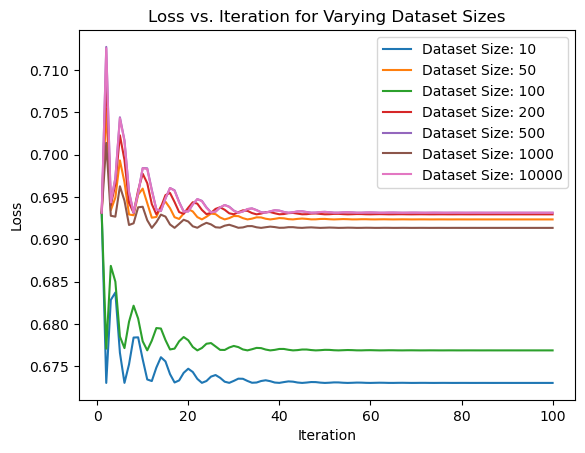

In [5]:
dataset_sizes = [10, 50, 100, 200, 500,1000,10000]
def negative_log_likelihood(p, dataset):
    return -(dataset * torch.log(p) + (1 - dataset) * torch.log(1 - p)).mean()

for size in dataset_sizes:
   
    dataset = torch.randint(low=0, high=2, size=(size,))
    p = torch.tensor(0.5, requires_grad=True)
    optimizer = Adam([p], lr=0.1)
    loss_values = []
    iteration_values = []
    for i in range(100):
        optimizer.zero_grad()
        loss = negative_log_likelihood(p, dataset)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
        iteration_values.append(i+1)
    plt.plot(iteration_values, loss_values, label=f'Dataset Size: {size}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration for Varying Dataset Sizes')
plt.legend()
plt.show()

The plot shows the relationship between the loss and the number of iterations for each dataset size. 

By examining the plot, we can observe the following:

1. As the dataset size increases, the convergence to the optimal parameter value tends to be faster. This is because larger datasets provide more information, allowing for more accurate estimation.

2. For smaller dataset sizes (e.g., 10, 50, 100), the loss tends to fluctuate more initially. However, as the number of iterations increases, the loss converges to a stable value.

3. For larger dataset sizes (e.g., 1000, 10000), the loss tends to converge quickly and stabilize earlier compared to smaller dataset sizes.

